In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install tensorflow
import tensorflow.keras as keras
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 14.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.7 MB/s eta 0:00:00
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 27.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 23.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 kB 10.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━

In [9]:
#Building the dataframe 
bookReviewDataSet_filename = os.path.join(os.getcwd(), "Downloads", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataSet_filename)
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


Preparing the data

In [23]:
y = df['Positive Review'] #label
X = df['Review']

#Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
#Implement TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
vocab_size = len(tfidf_vectorizer.vocabulary_)

print(vocab_size)

5000


Implement Model

In [25]:
nn_model = Sequential()

#input layer
nn_model.add(InputLayer(input_shape=(vocab_size,)))

# first hidden layer 
nn_model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.0005))) #Add L2 regularization
nn_model.add(keras.layers.Dropout(.2))

# second hidden layer layer 
nn_model.add(Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.0005)))
nn_model.add(keras.layers.Dropout(.2))


# output layer
nn_model.add(Dense(1, activation='sigmoid'))

# summary of neural network model structure
nn_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,177 (1.23 MB)

 Trainable params: 322,177 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#Defining optimizing and loss function and compiling the model 

#sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)  #Switch to Adam optimizer to test difference in model performance

loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

nn_model.compile(optimizer=adam_optimizer, loss=loss_fn, metrics=['accuracy'])

In [29]:
#Logs training metrics every `every_n` epochs during model training
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [31]:
#Fit the model
t0 = time.time() # start time

num_epochs = 10 # epochs

history = nn_model.fit(
    X_train_tfidf.toarray(),   
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 10], Accuracy: 0.9941, Loss: 0.1520, Val_accuracy: 0.7635, Val_loss: 0.5350
Epoch [10/ 10], Accuracy: 1.0000, Loss: 0.0883, Val_accuracy: 0.7500, Val_loss: 0.5906
Elapsed time: 1.27s


Evaluating Performance

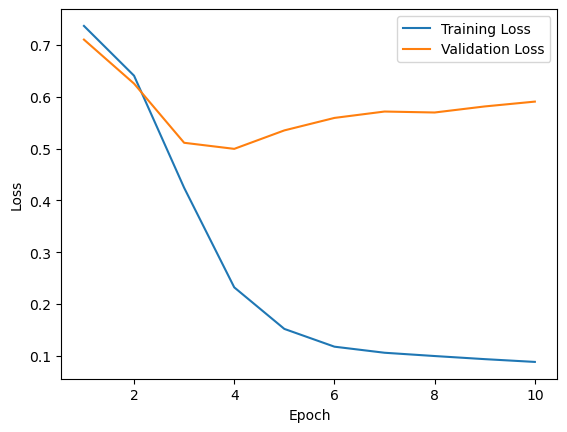

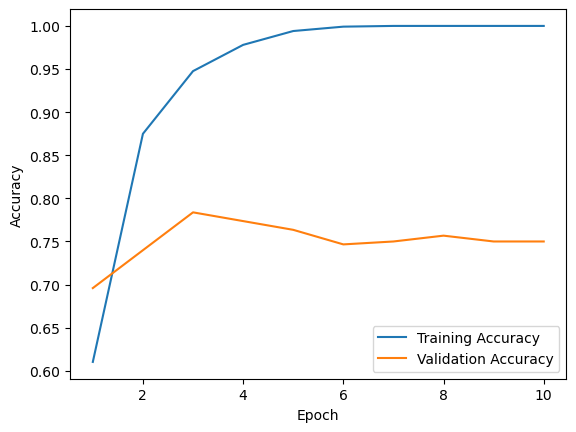

In [34]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
#Evaluate performance on test set 
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8219 - loss: 0.5206 
Loss:  0.5205832123756409 Accuracy:  0.8218623399734497


In [38]:
#Confusion Matrix
y_probs = nn_model.predict(X_test_tfidf.toarray())
y_pred = (y_probs > 0.5).astype(int)

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Confusion Matrix:
[[209  36]
 [ 52 197]]


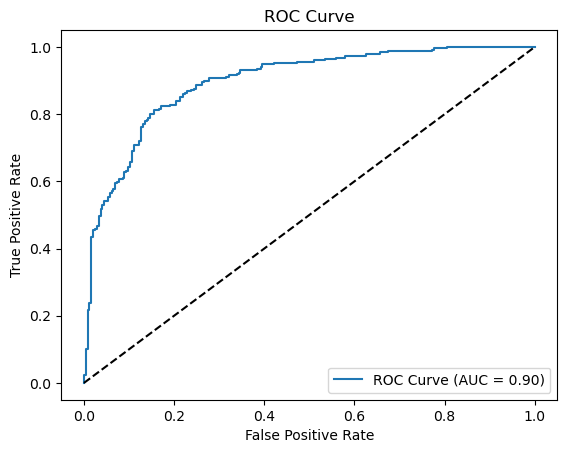

In [40]:
#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
#Make predictions on the test set 
predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 30 examples:")
y_test_array = y_test.to_numpy()

for i in range(30):
    prob = predictions[i][0]
    if prob > 0.5:
        print(f"Prediction: {prob:.4f} | Actual Label: {y_test_array[i]}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
Predictions for the first 30 examples:
Prediction: 0.9934 | Actual Label: True
Prediction: 0.9722 | Actual Label: True
Prediction: 0.6461 | Actual Label: True
Prediction: 0.9706 | Actual Label: True
Prediction: 0.6926 | Actual Label: True
Prediction: 0.6945 | Actual Label: False
Prediction: 0.6391 | Actual Label: True
Prediction: 0.9692 | Actual Label: True
Prediction: 0.6364 | Actual Label: False
Prediction: 0.9914 | Actual Label: True
Prediction: 0.9932 | Actual Label: True
Prediction: 0.8997 | Actual Label: True
Prediction: 0.5455 | Actual Label: False
